# Cyber Bullying Detection Project

## Notebook imports

In [405]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import string 
from nltk.stem import WordNetLemmatizer
import sklearn

## Getting the data, cleaning and processing

In [406]:
dataframe = pd.read_csv("data/processed_data.csv")

# show some columns of the dataset
dataframe.head(10)

,Tweets,Label
0,halalflaws biebervalue greenlinerzjm i read t...,0
1,shreyabafna3 now you idiots claim that people...,0
2,rt mooseoftorment call me sexist but when i go...,1
3,g0ssipsquirrelx wrong isis follows the exampl...,1
4,mkr no no no no no no,0
5,rt trobinsonnewera http t co nkkcbpcheo saudi ...,0
6,rt millhouse66 maureen_js nooo not sexist but ...,1
7,going to make some pancakes don t hve any stra...,0
8,rt ahtweet freebsdgirl how dare you have feeli...,0
9,rt newmanzaa there s something wrong when a gi...,1


In [407]:
dataframe.tail(10)

,Tweets,Label
58596,Her pussy so good like I left something,1
58597,Her pussy sweeter then some fresh fruit &#1285...,1
58598,Her pussy wet I call it Fiji water,1
58599,Here I go! Welcome to the titty show. Typa ass...,1
58600,Here some kimora boobies for you &#128139; &#1...,1
58601,Here this bitch go ... Lol,1
58602,Here this nigga go RT @ZigzagsxKush: Damn dark...,1
58603,Here we go brownies here we go! WOOF WOOF!,0
58604,Here we go this fat bitch started talking and ...,1
58605,Here yall hoes go dicc ridin,1


## Get dataset info

In [408]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58606 entries, 0 to 58605
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  58606 non-null  object
 1   Label   58606 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


## Get statistical description of dataset (numerical values): mean, std, max, min, etc.


In [409]:
dataframe.describe()

,Label
count,58606.000000
mean,0.268403
std,0.443132
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## check if any entry in our dataset is empty (has a null value)


In [410]:
dataframe.Label.isnull().sum()

0

## Get the total number of null rows in the data


In [411]:
null_data = dataframe[dataframe.isnull().any(axis=1)]

null_data  # returns an empty table

,Tweets,Label


## Visualizing our Data

Text(0.5, 1.0, 'Class Distributions \n 0: Normal      1: Bully')

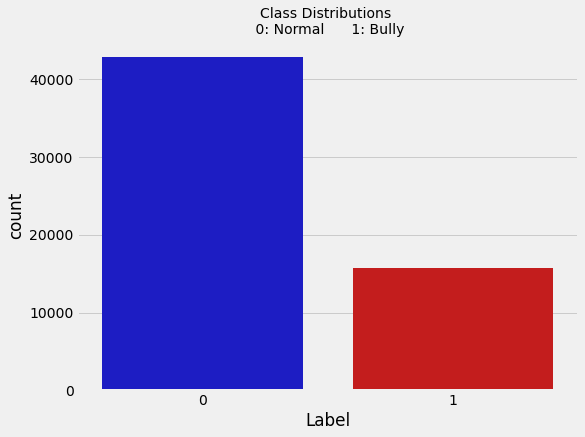

In [412]:
colors = ["#0101DF", "#DF0101"]

plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=dataframe, palette=colors)
plt.title('Class Distributions \n 0: Normal      1: Bully', fontsize=14, color='k')

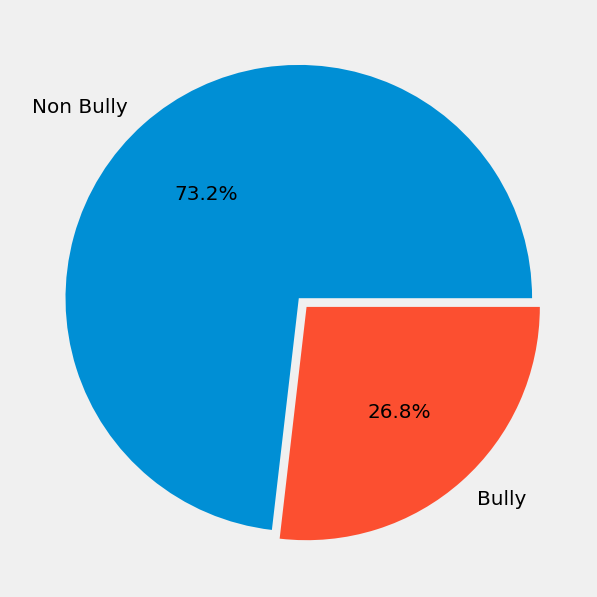

In [413]:
category_names = ['Non Bully', 'Bully']
sizes = [dataframe.Label.value_counts()[0], dataframe.Label.value_counts()[1]]

plt.figure(figsize=(10,10))
plt.pie(sizes, labels=category_names, autopct='%1.1f%%', explode=[0, 0.05], textprops={'fontsize': 20})
plt.show()

# Cleaning the data

## Clean the text data by stripping it of all unwanted characters: @, #, &, etc.


In [414]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower()) + 
            ' '.join(emoticons).replace('-', ''))
    return text

In [415]:
# example before cleaning

dataframe.loc[0, 'Tweets']

' halalflaws biebervalue greenlinerzjm i read them in context no change in meaning the history of islamic slavery https t co xwjzpsodgj'

In [416]:
# after cleaning

preprocessor(dataframe.loc[0, 'Tweets'])

' halalflaws biebervalue greenlinerzjm i read them in context no change in meaning the history of islamic slavery https t co xwjzpsodgj'

In [417]:
# applying the preprocessor to out data
dataframe['Tweets'] = dataframe['Tweets'].apply(preprocessor)

## Special characters removed

In [418]:
dataframe.head(10)

,Tweets,Label
0,halalflaws biebervalue greenlinerzjm i read t...,0
1,shreyabafna3 now you idiots claim that people...,0
2,rt mooseoftorment call me sexist but when i go...,1
3,g0ssipsquirrelx wrong isis follows the exampl...,1
4,mkr no no no no no no,0
5,rt trobinsonnewera http t co nkkcbpcheo saudi ...,0
6,rt millhouse66 maureen_js nooo not sexist but ...,1
7,going to make some pancakes don t hve any stra...,0
8,rt ahtweet freebsdgirl how dare you have feeli...,0
9,rt newmanzaa there s something wrong when a gi...,1


## Processing Tweets into tokens (tokenization)

In [419]:
def tokenizer(text):
    return text.split()

tokenizer('runners like running and thus they run')

['runners', 'like', 'running', 'and', 'thus', 'they', 'run']

In [420]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

tokenizer_porter('runners like running and thus they run')

['runner', 'like', 'run', 'and', 'thu', 'they', 'run']

## Removing stops words: go, the, at, a, and etc

In [421]:
stop = stopwords.words('english')
[w for w in tokenizer_porter('a runner likes running and runs a lot')[-10:] if w not in stop]

['runner', 'like', 'run', 'run', 'lot']

## First, we will define a tokenizer function that cleans the unprocessed text data and separate it into word tokens while removing stop-words:


In [422]:
stop = stopwords.words('english')

def tokenizer(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text.lower())
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    tokenized = [w for w in text.split() if w not in stop]
    return tokenized

## Next, we will define a generator function, stream_docs, that reads in and returns one document at a time:


In [423]:
def stream_docs(path):
    with open(path, 'r', encoding='utf-8') as csv:
        next(csv) # skip header
        for line in csv:
            text, label = line[:-3], int(line[-2])
            yield text, label

## To verify that our stream_docs function works correctly, let's read in the first document from the file, which should return a tuple consisting  of the Tweet text as well as the corresponding class label:


In [424]:
next(stream_docs(path='data/twitter_parsed_dataset.csv'))

('5.74948705591165E+017,5.74948705591165E+017,@halalflaws @biebervalue @greenlinerzjm I read them in context.No change in meaning. The history of Islamic slavery. https://t.co/xWJzpSodGj,none',
 0)

In [425]:
# We will now define a function, get_minibatch, that will take a document stream 
# from the stream_docs function and return a particular number of documents
# specified by the size parameter:

def get_minibatch(doc_stream, size):
    docs, y = [], []
    try:
        for _ in range(size):
            text, label = next(doc_stream)
            docs.append(text)
            y.append(label)
    except StopIteration:
        return None, None
    return docs, y

In [426]:
from sklearn.feature_extraction.text import HashingVectorizer
# from distutils.version import LooseVersion as Version
# from sklearn import __version__ as sklearn_version


vect = HashingVectorizer(decode_error='ignore',
                         n_features=2**21,
                         preprocessor=None,
                         tokenizer=tokenizer
                        )
doc_stream = stream_docs(path='data/processed_data.csv')

# Splitting our dataset into training and testing set for training and evaluating our model using sklearn train_test_split method

In [427]:
from sklearn.model_selection import train_test_split

X, y = dataframe.Tweets, dataframe.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [428]:
X_train = vect.fit_transform(X_train)

C:\Users\Ben\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [429]:
X_test = vect.transform(X_test)

# Evaluating different models: SVM, KNN

## KNN

In [430]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn_clf = KNN()

knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [498]:
y_pred = knn_clf.predict(X_test)

In [433]:
print('Accuracy: %.3f' % knn_clf.score(X_test, y_test))

Accuracy: 0.764


## Checking the accuracy of our KNN

In [53]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [432]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F1_score: {f1_score(y_test, y_pred)}')

Accuracy: 0.764133773177113
Recall: 0.15230419508162843
Precision: 0.9424552429667519
F1_score: 0.2622309197651663


<AxesSubplot:>

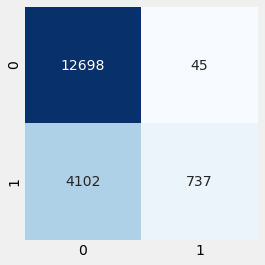

In [499]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [441]:
label = {0:'None Bully', 1:'Bully'}

example = ["you are a dick"]
# example = ["haha, evil dick & sex whore i know how retarded you are and slut"]
X = vect.transform(example)
print('Prediction: %s\nProbability: %.2f%%' %\
      (label[knn_clf.predict(X)[0]], 
       np.max(knn_clf.predict_proba(X))*100))

Prediction: Bully
Probability: 80.00%


## SVM

In [442]:
from sklearn.svm import SVC
svm_clf = SVC()

svm_clf.fit(X_train, y_train)

SVC()

In [443]:
print('Accuracy: %.3f' % svm_clf.score(X_test, y_test))

Accuracy: 0.913


In [502]:
y_pred = svm_clf.predict(X_test)

In [445]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F1_score: {f1_score(y_test, y_pred)}')

Accuracy: 0.912922306904789
Recall: 0.7402355858648481
Precision: 0.928941908713693
F1_score: 0.82392179413456


<AxesSubplot:>

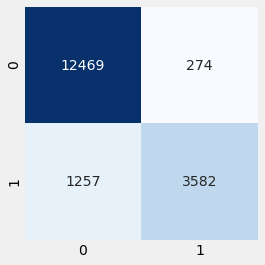

In [503]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [450]:
label = {0:'None Bully', 1:'Bully'}

# example = ["According to Holly from Geordie Shore, sexy ""Sassy - halfway between slut and classy"]
example = ["you are a racist"]
X = vect.transform(example)
print(f'Prediction: {label[svm_clf.predict(X)[0]]}' )

Prediction: Bully


## Decision Tree

In [451]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_train, y_train,)

DecisionTreeClassifier()

In [452]:
print('Accuracy: %.3f' % tree_clf.score(X_test, y_test))

Accuracy: 0.901


In [453]:
y_pred = tree_clf.predict(X_test)

In [454]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F1_score: {f1_score(y_test, y_pred)}')

Accuracy: 0.9006938914799226
Recall: 0.7983054350072329
Precision: 0.8338009928771855
F1_score: 0.8156672297297297


<AxesSubplot:>

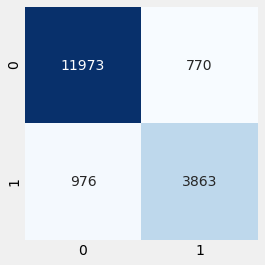

In [455]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [460]:
label = {0:'None Bully', 1:'Bully'}

# example = ["dick head and fool hating people"]
example = ["you nigerians are racist"]
X = vect.transform(example)
print('Prediction: %s\nProbability: %.2f%%' %\
      (label[tree_clf.predict(X)[0]], 
       np.max(tree_clf.predict_proba(X))*100))

Prediction: Bully
Probability: 100.00%


In [462]:
from sklearn.linear_model import SGDClassifier
classes = np.array([0, 1])
sgd_clf = SGDClassifier(loss='log', random_state=1)

sgd_clf.fit(X_train, y_train)

SGDClassifier(loss='log', random_state=1)

In [463]:
print('Accuracy: %.3f' % sgd_clf.score(X_test, y_test))

Accuracy: 0.882


In [500]:
y_pred = sgd_clf.predict(X_test)

In [465]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'F1_score: {f1_score(y_test, y_pred)}')

Accuracy: 0.8824365828688432
Recall: 0.6199628022318661
Precision: 0.929368029739777
F1_score: 0.7437709185570843


<AxesSubplot:>

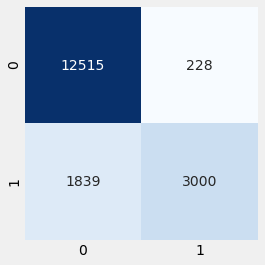

In [501]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)

In [467]:
label = {0:'None Bully', 1:'Bully'}

example = ["dick head and thief, i hate you"]
# example = ["scammer"]
X = vect.transform(example)
print('Prediction: %s\nProbability: %.2f%%' %\
      (label[sgd_clf.predict(X)[0]], 
       np.max(sgd_clf.predict_proba(X))*100))

Prediction: Bully
Probability: 61.69%


In [468]:
# combining our models
from sklearn.ensemble import VotingClassifier

ensemble_classifier = VotingClassifier(
    estimators=[('knn_clf', knn_clf),
                ('tree_clf', tree_clf),
                ('svm', svm_clf),
                ('sgd_clf', sgd_clf)],
    voting='hard')

ensemble_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('knn_clf', KNeighborsClassifier()),
                             ('tree_clf', DecisionTreeClassifier()),
                             ('svm', SVC()),
                             ('sgd_clf',
                              SGDClassifier(loss='log', random_state=1))])

In [469]:
ensemble_classifier.score(X_train, y_train)

0.9095407566302652

In [481]:
example = ["dick head and thief, i hate you"]

X = vect.transform(example)
ensemble_classifier.predict(X)
print(f'Prediction: {(label[tree_clf.predict(X)[0]])}')

Prediction: Bully


## From our models results and accuracy, we can see that the Decision tree and KNN models seems perform well on our data

In [508]:
# lastly, we'll save our models


import joblib

joblib.dump(knn_clf,'knn.joblib')
joblib.dump(svm_clf,'svm.joblib')
joblib.dump(tree_clf,'tree.joblib')
joblib.dump(sgd_clf,'sgd.joblib')
joblib.dump(ensemble_classifier, 'ensemble_classifier.joblib')

['ensemble_classifier.joblib']